# Today we are playing with different types of data and unsupervised learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn import metrics
from time import time


# NBA players' clustering

In [2]:
nba=pd.read_csv(r'C:\Users\eldiy\Documents\GitHub\My own labs\mlcourse.ai\data/nba_2013.csv')

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
from yellowbrick.cluster import KElbowVisualizer

In [5]:
kmeans=KMeans()

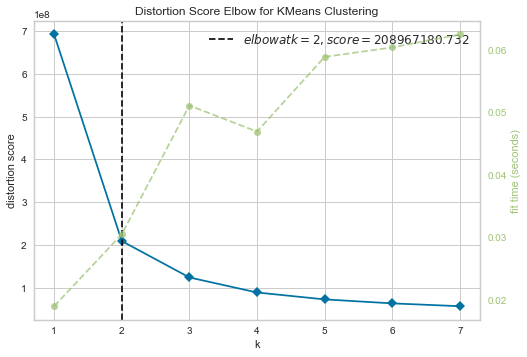

In [6]:
viz=KElbowVisualizer(kmeans, k=(1,8))

num_cols=nba._get_numeric_data().dropna(axis=1)
viz.fit(num_cols)
viz.poof()

In [7]:
inertia=[]
for k in range(1,8):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(num_cols)
    inertia.append(np.sqrt(kmeans.inertia_))

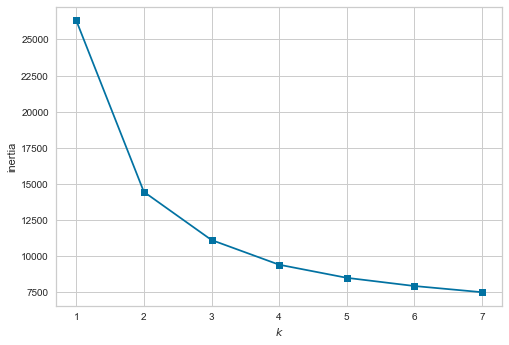

In [8]:
plt.plot(range(1,8),inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('inertia');

In [9]:
kmeans=KMeans(n_clusters=3, random_state=1)
kmeans.fit(num_cols)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

# We do PCA just to see the data in 2 dimensions. 

In [14]:
pca=PCA(2)

In [15]:
res=pca.fit_transform(num_cols)

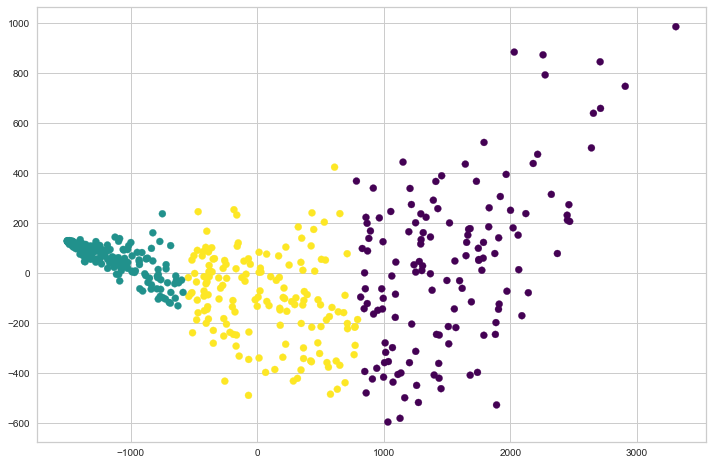

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(res[:,0],res[:,1], c=kmeans.labels_, cmap='viridis')

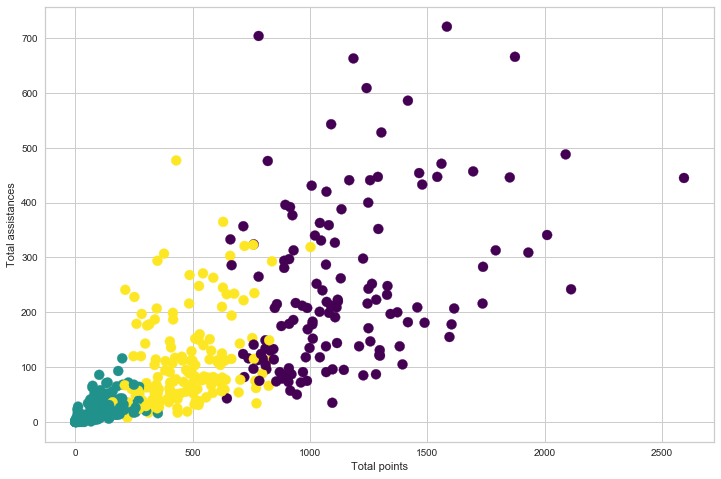

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'],nba.ast, c=kmeans.labels_, cmap='viridis',s=100)
plt.xlabel('Total points')
plt.ylabel('Total assistances');

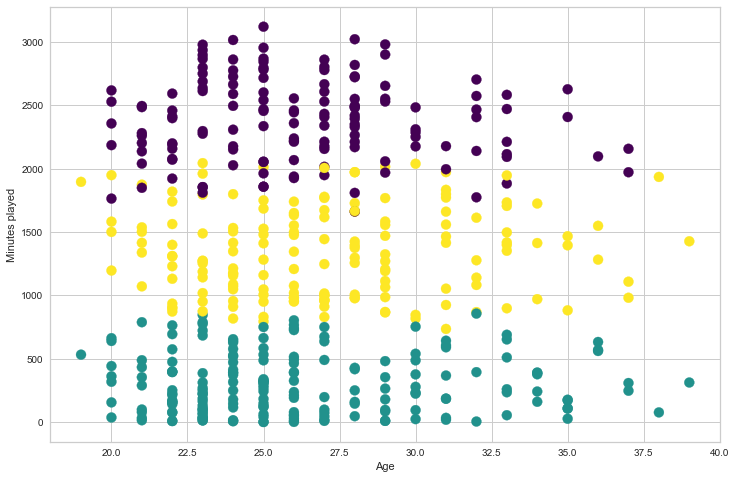

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(nba.age,nba.mp, c=kmeans.labels_, cmap='viridis',s=100)
plt.xlabel('Age')
plt.ylabel('Minutes played');

# Image transformation

In [19]:
img=mpimg.imread(r'C:\Users\eldiy\Documents\GitHub\My own labs\mlcourse.ai\img/cv2-12.jpg')[...,1]

In [20]:
img1=mpimg.imread(r'C:\Users\eldiy\Documents\GitHub\My own labs\mlcourse.ai\img/cv2-12.jpg')

In [21]:
img.shape

(525, 700)

In [22]:
img1.shape

(525, 700, 3)

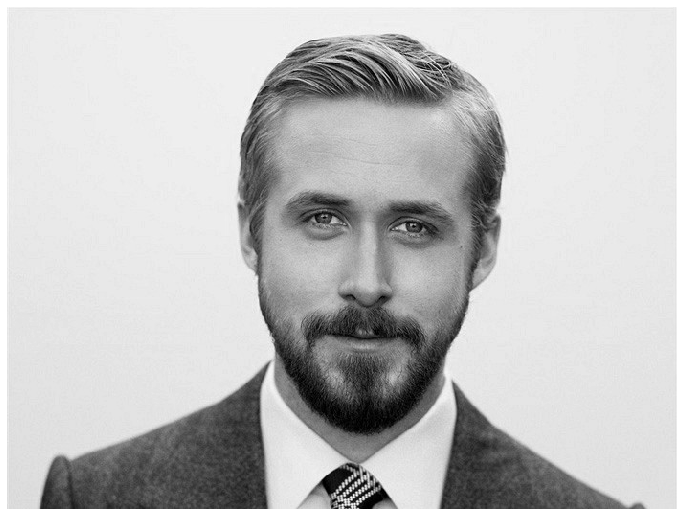

In [23]:
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(img, cmap='gray');

In [24]:
X=img.reshape((-1,1))
print(img.shape)
print(X.shape)

(525, 700)
(367500, 1)


In [25]:
kmeans=MiniBatchKMeans(n_clusters=3)
kmeans.fit(X)
values=kmeans.cluster_centers_
labels=kmeans.labels_

In [26]:
img_compressed = values[labels].reshape(img.shape)

In [27]:
img_compressed.shape

(525, 700)

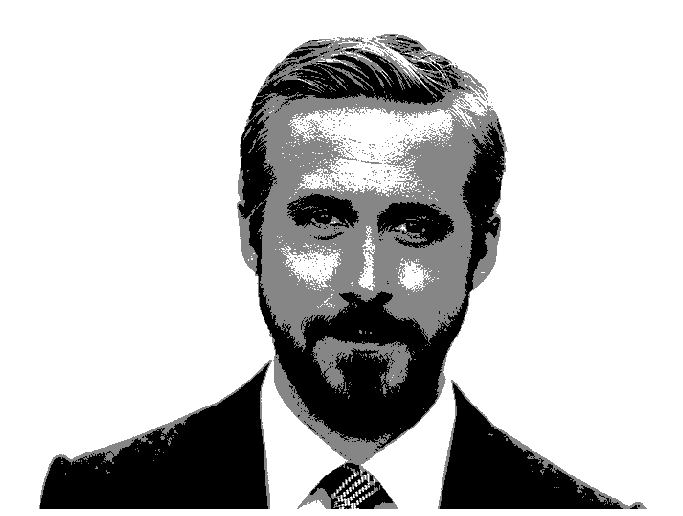

In [28]:
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(img_compressed, cmap='gray');

# News Tags Detection

In [29]:
categories=[
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

In [30]:
print('Loading...\ncategories')
dataset=datasets.fetch_20newsgroups(subset='all',categories=categories, shuffle=True, random_state=42)

Loading...
categories


In [31]:
print(f'{len(dataset.data)} documents')
print(f'{len(dataset.target_names)} categories')

3387 documents
4 categories


In [32]:
labels=dataset.target
true_k=np.unique(labels).shape[0]
true_k

4

In [33]:
dataset.data[0]

'From: healta@saturn.wwc.edu (Tammy R Healy)\nSubject: Re: who are we to judge, Bobby?\nLines: 38\nOrganization: Walla Walla College\nLines: 38\n\nIn article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:\n>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )\n>Subject: Re: who are we to judge, Bobby?\n>Date: Wed, 14 Apr 1993 21:33:56 GMT\n>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:\n>>Bobby,\n>>\n>>I would like to take the liberty to quote from a Christian writer named \n>>Ellen G. White.  I hope that what she said will help you to edit your \n>>remarks in this group in the future.\n>>\n>>"Do not set yourself as a standard.  Do not make your opinions, your views \n>>of duty, your interpretations of scripture, a criterion for others and in \n>>your heart condemn them if they do not come up to your ideal."\n>>                         Thoughts Fromthe Mount of Blessing p. 124\n>>\n>>I hope quoting 

In [34]:
print('detect features from dataset')
vector=TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english')
X=vector.fit_transform(dataset.data)
print(f'n_samples: {X.shape[0]}, n_features:{X.shape[1]}')

detect features from dataset
n_samples: 3387, n_features:1000


In [35]:
km=KMeans(n_clusters=true_k)

In [36]:
print(f'clustering with {km}')
km.fit(X)



clustering with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
print(f'silhouette score: {metrics.silhouette_score(X,km.labels_)}')

silhouette score: 0.017566040823722477


In [38]:
terms=vector.get_feature_names()
for i in range(true_k):
    print(f'cluster {i+1}:')
    for ind in km.cluster_centers_.argsort()[:,::-1][i,:10]:
        print(f'{terms[ind]}', end=' ')
    print()

cluster 1:
god com people don article say keith think jesus just 
cluster 2:
space nasa access henry digex gov pat toronto alaska com 
cluster 3:
graphics university com thanks posting host nntp image ac computer 
cluster 4:
sandvik kent apple newton com private activities wrote jesus net 


In [39]:
km.cluster_centers_.shape

(4, 1000)

In [40]:
km.cluster_centers_

array([[3.23071697e-04, 3.71756814e-03, 4.84505830e-03, ...,
        2.09396547e-04, 7.13964369e-05, 0.00000000e+00],
       [4.81266935e-03, 7.78500985e-03, 1.24684741e-02, ...,
        0.00000000e+00, 2.64244859e-02, 1.71330501e-02],
       [5.76803384e-03, 2.66498881e-03, 1.34225428e-02, ...,
        4.96315498e-03, 1.11151301e-05, 0.00000000e+00],
       [1.29050568e-03, 2.52355556e-03, 4.66693166e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [41]:
km.cluster_centers_.argsort()

array([[999, 704, 698, ..., 651, 192, 371],
       [636, 675, 385, ...,  46, 588, 830],
       [999, 336, 885, ..., 192, 926, 380],
       [999, 339, 340, ...,  80, 474, 769]], dtype=int64)

In [42]:
km.cluster_centers_.argsort()[:,::-1]

array([[371, 192, 651, ..., 698, 704, 999],
       [830, 588,  46, ..., 385, 675, 636],
       [380, 926, 192, ..., 885, 336, 999],
       [769, 474,  80, ..., 340, 339, 999]], dtype=int64)

In [43]:
km.cluster_centers_.argsort()[:,::-1][i,:10]

array([769, 474,  80, 606, 192, 692,  51, 990, 458, 599], dtype=int64)

In [44]:
?np.argsort

In [45]:
text_df=pd.DataFrame(dataset.data,columns=['text'])
text_df['true']=dataset.target
text_df['cluster']=km.labels_

In [46]:
text_df.head()

,text,true,cluster
0,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...,0,0
1,From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana...,1,2
2,Subject: PHIGS User Group Conference\nFrom: ha...,1,2
3,From: joslin@pogo.isp.pitt.edu (David Joslin)\...,3,0
4,From: adaptive@cs.nps.navy.mil (zyda res acct)...,1,2


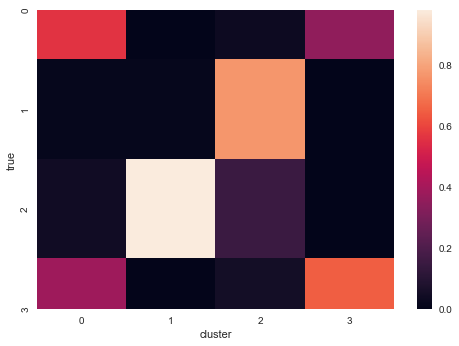

In [47]:
import seaborn as sns
sns.heatmap(pd.crosstab(text_df.true, text_df.cluster, normalize='columns'))


In [48]:
pd.crosstab(text_df.true, text_df.cluster, normalize='columns')

cluster,0,1,2,3
true,,,,
0,0.561129,0.001307,0.034063,0.353982
1,0.014107,0.014379,0.765612,0.000000
2,0.042320,0.977778,0.150041,0.000000
3,0.382445,0.006536,0.050284,0.646018


In [49]:
dataset.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

# Hand written number detection

In [50]:
digits=datasets.load_digits()

In [51]:
X,y=digits.data, digits.target

In [52]:
kmeans=KMeans(10)

In [53]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([2, 8, 8, ..., 8, 5, 5])

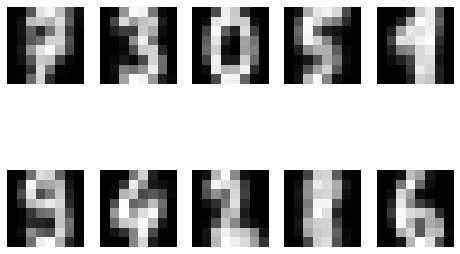

In [55]:
fig,axes=plt.subplots(2,5)
for ax,center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8,8),cmap='gray')
    ax.axis('off')


In [56]:
0,3,8,7,2
9,4,1,5,6

(9, 4, 1, 5, 6)

In [57]:
X.shape

(1797, 64)

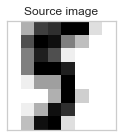

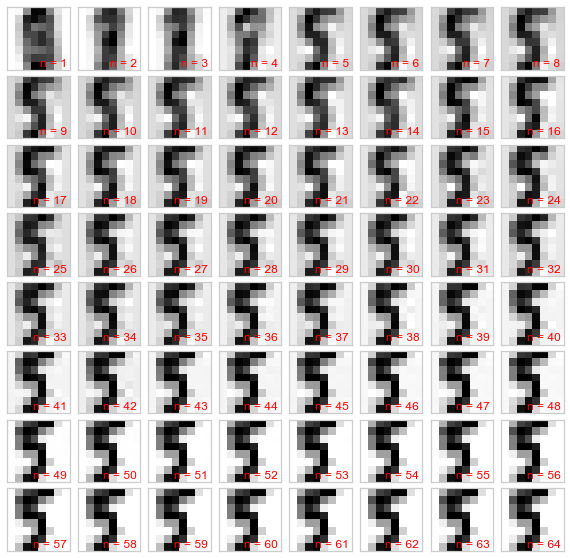

In [58]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

In [59]:
np.round(pca.explained_variance_ratio_,2)

array([0.15, 0.14, 0.12, 0.08, 0.06, 0.05, 0.04, 0.04, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [60]:
pca.explained_variance_ratio_[:20].sum()

0.8943031165985266

In [61]:
pca=PCA(20).fit(X)

In [62]:
pca=PCA(0.85).fit(X)
pca.n_components_

17

In [63]:
X1=pca.transform(X)

In [64]:
kmeans=KMeans(10)
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
kmeans.labels_

array([3, 5, 5, ..., 5, 7, 7])

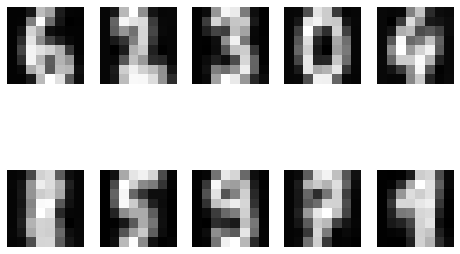

In [66]:
fig,axes=plt.subplots(2,5)
for ax,center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(pca.inverse_transform(center).reshape(8,8),cmap='gray')
    ax.axis('off')


In [67]:
6,7,0,5,9
2,3,8,4,1

(2, 3, 8, 4, 1)

In [68]:
pd.get_dummies(data=pd.DataFrame(kmeans.labels_,columns=['label']), columns=['label'])

,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1792,0,0,0,0,0,0,0,1,0,0
1793,0,0,0,1,0,0,0,0,0,0
1794,0,0,0,0,0,1,0,0,0,0
1795,0,0,0,0,0,0,0,1,0,0


In [69]:
X[11]

array([ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
       16.,  2.,  0.,  0.,  0.,  0., 14., 16., 12.,  0.,  0.,  0.,  1.,
       10., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 14., 16.,  9.,  0.,
        0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
       16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  1.,  0.])